<a href="https://colab.research.google.com/github/samuelaojih/Google-Colab/blob/main/Built_up_Change_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import geemap as gee

In [2]:
ee.Authenticate()
ee.Initialize(project = 'ee-samuelojihcool')

In [3]:
cor = [[8.745118789723874,9.690682459589],\
       [9.006044082692624,9.690682459589],\
       [9.006044082692624,10.018115071797768],\
       [8.745118789723874,10.018115071797768],\
       [8.745118789723874,9.690682459589]]

In [4]:
cor

[[8.745118789723874, 9.690682459589],
 [9.006044082692624, 9.690682459589],
 [9.006044082692624, 10.018115071797768],
 [8.745118789723874, 10.018115071797768],
 [8.745118789723874, 9.690682459589]]

In [5]:
roi = ee.Geometry.Polygon(cor)
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              8.745118789723874,
              9.690682459589
            ],
            [
              9.006044082692624,
              9.690682459589
            ],
            [
              9.006044082692624,
              10.018115071797768
            ],
            [
              8.745118789723874,
              10.018115071797768
            ],
            [
              8.745118789723874,
              9.690682459589
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [6]:
map = gee.Map(basemap = 'SATELLITE')
map.centerObject(roi)
map.addLayer(roi,{} ,'roi')
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [7]:
built = ee.ImageCollection("JRC/GHSL/P2023A/GHS_BUILT_S").select('built_surface')
built

In [8]:
stack = built.toBands().clip(roi)
stack

In [9]:
map.addLayer(stack, {},'stack')

In [10]:
def ext_area(img):
  thr = img.gt(0)
  mask = thr.updateMask(thr)
  area = mask.multiply(ee.Image.pixelArea())
  val = area.reduceRegion(reducer = ee.Reducer.sum(), geometry = roi, scale = 100).values().get(0)
  date = img.date().format('YYYY-MM-dd')
  return ee.Feature(None, {'date': date, 'area': val})

In [11]:
built_area = built.map(ext_area)
built_area

In [12]:
area_list = built_area.toList(built_area.size()).getInfo()
area_list

[{'type': 'Feature',
  'geometry': None,
  'id': '1975',
  'properties': {'area': 156563644.8854779, 'date': '1975-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1980',
  'properties': {'area': 191655429.4615578, 'date': '1980-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1985',
  'properties': {'area': 221429841.0310163, 'date': '1985-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1990',
  'properties': {'area': 246913159.88920406, 'date': '1990-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '1995',
  'properties': {'area': 259581943.2627143, 'date': '1995-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2000',
  'properties': {'area': 268863696.94094765, 'date': '2000-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2005',
  'properties': {'area': 300275225.3485227, 'date': '2005-01-01'}},
 {'type': 'Feature',
  'geometry': None,
  'id': '2010',
  'properties': {'area': 327542262.3679086, 'date': '2010-01-01'}}

In [13]:
date = [item['properties']['date'] for item in area_list]
date

['1975-01-01',
 '1980-01-01',
 '1985-01-01',
 '1990-01-01',
 '1995-01-01',
 '2000-01-01',
 '2005-01-01',
 '2010-01-01',
 '2015-01-01',
 '2020-01-01',
 '2025-01-01',
 '2030-01-01']

In [14]:
area = [item['properties']['area'] for item in area_list]
area

[156563644.8854779,
 191655429.4615578,
 221429841.0310163,
 246913159.88920406,
 259581943.2627143,
 268863696.94094765,
 300275225.3485227,
 327542262.3679086,
 365024621.41279215,
 393224567.34191686,
 422444162.3353187,
 443745978.6510588]

In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.DataFrame({'date': date, 'area': area})
df['date'] = pd.to_datetime(df['date'])
df_index = df.set_index('date').divide(1e6).round(2)
df_index

,area
date,
1975-01-01,156.56
1980-01-01,191.66
1985-01-01,221.43
1990-01-01,246.91
1995-01-01,259.58
2000-01-01,268.86
2005-01-01,300.28
2010-01-01,327.54
2015-01-01,365.02


In [17]:
df_index.to_csv('built_area_jos.csv')

<Axes: xlabel='date'>

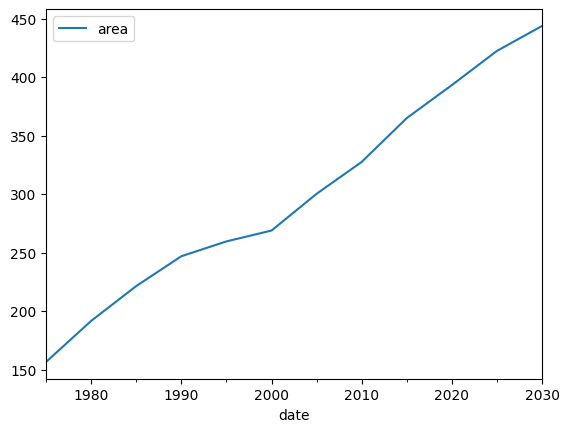

In [18]:
df_index.plot()

In [19]:
"""change_perce = ((current - previous)/ previous) * 100"""

'change_perce = ((current - previous)/ previous) * 100'

In [20]:
current = df_index.copy()
previous = df_index.shift(1)
previous

,area
date,
1975-01-01,NaN
1980-01-01,156.56
1985-01-01,191.66
1990-01-01,221.43
1995-01-01,246.91
2000-01-01,259.58
2005-01-01,268.86
2010-01-01,300.28
2015-01-01,327.54


In [21]:
change = ((current - previous)/previous) * 100
change

,area
date,
1975-01-01,NaN
1980-01-01,22.419520
1985-01-01,15.532714
1990-01-01,11.507023
1995-01-01,5.131424
2000-01-01,3.575006
2005-01-01,11.686380
2010-01-01,9.078194
2015-01-01,11.442877


<Axes: xlabel='date'>

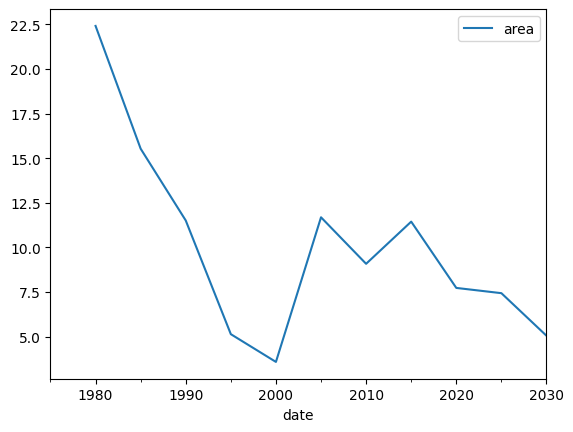

In [22]:
change.plot()